In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [33]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [34]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [35]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [36]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [37]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [38]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

<AxesSubplot:>

<AxesSubplot:>

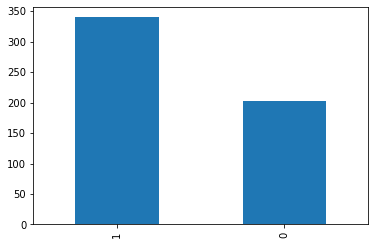

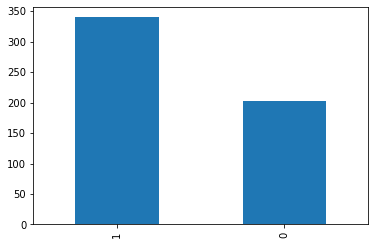

In [39]:
train.IsUnderRisk.value_counts().plot(kind='bar')

In [40]:
X = train.iloc[:, train.columns != 'IsUnderRisk']  # Removing the Target variable from the x variable
y = train.iloc[:, train.columns == 'IsUnderRisk']  # Taking only the target variable in y variable

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)  # Spliting in 80 20 ratio

In [43]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

LogisticRegression()

In [44]:
reg.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [45]:
reg.score(X_test,y_test)

0.8073394495412844

0.8073394495412844

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dropout(0.05), 
                             tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='binary_crossentropy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Model: "sequential_2"
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 24        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
 dense_4 (Dense)             (None, 3)                 24        
                                                                 
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
                                                                 
 dense_5 (Dense)             (No

In [48]:
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
Epoch 1/50
14/14 [==============================] - 0s 1ms/step - loss: 6.4238
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 6.4238
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 1.5423
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 1.5423
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9540
Epoch 4/50
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8837
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8605
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6455
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6455
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5729
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5729
Epoch 9/50
14/14 [============

In [49]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.5536


0.5536211729049683

0.5536211729049683

In [50]:
model.predict(X_test)

array([[0.44591045],
       [0.11866596],
       [0.68500614],
       [0.95339787],
       [0.91658366],
       [0.52690095],
       [0.0832777 ],
       [0.8376626 ],
       [0.933847  ],
       [0.5675538 ],
       [0.9629115 ],
       [0.85563743],
       [0.0450905 ],
       [0.9815324 ],
       [0.08550292],
       [0.77638316],
       [0.33921796],
       [0.169972  ],
       [0.34362245],
       [0.44741052],
       [0.85936195],
       [0.23424187],
       [0.5152222 ],
       [0.06888431],
       [0.5775451 ],
       [0.09446034],
       [0.04054949],
       [0.50627   ],
       [0.1693146 ],
       [0.33014685],
       [0.32739308],
       [0.9277561 ],
       [0.88940406],
       [0.9190886 ],
       [0.06552169],
       [0.6784826 ],
       [0.7459736 ],
       [0.7179687 ],
       [0.22949135],
       [0.49259186],
       [0.05541092],
       [0.07492512],
       [0.7097317 ],
       [0.89588296],
       [0.9575489 ],
       [0.03256565],
       [0.9673398 ],
       [0.523

array([[0.44591045],
       [0.11866596],
       [0.68500614],
       [0.95339787],
       [0.91658366],
       [0.52690095],
       [0.0832777 ],
       [0.8376626 ],
       [0.933847  ],
       [0.5675538 ],
       [0.9629115 ],
       [0.85563743],
       [0.0450905 ],
       [0.9815324 ],
       [0.08550292],
       [0.77638316],
       [0.33921796],
       [0.169972  ],
       [0.34362245],
       [0.44741052],
       [0.85936195],
       [0.23424187],
       [0.5152222 ],
       [0.06888431],
       [0.5775451 ],
       [0.09446034],
       [0.04054949],
       [0.50627   ],
       [0.1693146 ],
       [0.33014685],
       [0.32739308],
       [0.9277561 ],
       [0.88940406],
       [0.9190886 ],
       [0.06552169],
       [0.6784826 ],
       [0.7459736 ],
       [0.7179687 ],
       [0.22949135],
       [0.49259186],
       [0.05541092],
       [0.07492512],
       [0.7097317 ],
       [0.89588296],
       [0.9575489 ],
       [0.03256565],
       [0.9673398 ],
       [0.523

In [51]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, reg.predict_proba(X_test)[:, 1])

0.890909090909091

0.890909090909091

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
Y = np.array(y)
y_ = Y.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [54]:
encoder = OneHotEncoder(sparse=False)
y_new = encoder.fit_transform(y_)
y_new

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,y_new,test_size=0.2)

In [56]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dense(2, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Model: "sequential_3"
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 24        
                                                                 
 dense_6 (Dense)             (None, 3)                 24        
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Total params: 32
Non-trainable params: 0
Trainable params: 32
________________________________________________________________

In [57]:
model2.fit(X_test,y_test, epochs=50)

Epoch 1/50
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 6.2780
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 6.2780
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 2.9553
Epoch 3/50
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 2.8438
Epoch 4/50
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.0382
Epoch 5/50
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 1.5604
Epoch 6/50
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.6552
Epoch 7/50
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.8337
Epoch 8/50
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 2.2059
Epoch 9/50
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 2.4703
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 2.4703
Epoch 10/50
4/4 [==============================] - 0s 3ms/step -

In [58]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 993us/step - loss: 1.1865


1.1864787340164185

1.1864787340164185

In [59]:
model2_predict = model2.predict(x_test)

In [60]:
from sklearn.metrics import log_loss
log_loss(y_test,model2_predict)

1.1864786784104797

1.1864786784104797